# 1A 1742-294

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime
from pathlib import Path
from astropy.time import Time
import pandas as pd

In [4]:
def plot(events):
    fig, ax = plt.subplots(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    xfmt = mdates.DateFormatter('%d/%m/%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_yticklabels([])
    plt.grid()
#     plt.savefig("examples/example9.png", bbox_inches='tight')
    plt.show()

In [5]:
bursts_url = 'https://burst.sci.monash.edu/aqoutput?dtype=bursts&fields=name%2Ctime%2Cinstr&output=topcat&timef=mjd&qfield=name&query_op=%3D&query_val=1A+1742-294'
bursts_table=pd.read_csv(bursts_url, comment='#', sep='\t', header=0, index_col=False)
bursts_table['time_s'] = [datetime.datetime.strptime(x.iso, '%Y-%m-%d %H:%M:%S.%f') for x in Time(bursts_table['time'], format='mjd')]

osbervations_url = 'https://burst.sci.monash.edu/aqoutput?dtype=observations&fields=name%2Ctstart%2Cinstr%2Ctstop&output=topcat&timef=mjd&qfield=name&query_op=%3D&query_val=1A+1742-294'
osbervations_table=pd.read_csv(osbervations_url, comment='#', sep='\t', header=0, index_col=False)
osbervations_table['tstart_s'] = [datetime.datetime.strptime(x.iso, '%Y-%m-%d %H:%M:%S.%f') for x in Time(osbervations_table['tstart'], format='mjd')]
osbervations_table['tstop_s'] = [datetime.datetime.strptime(x.iso, '%Y-%m-%d %H:%M:%S.%f') for x in Time(osbervations_table['tstop'], format='mjd')]

In [ ]:
fig, ax = plt.subplots(figsize=(20,1))
# plt.plot([bursts_table['time_s'][0], bursts_table['time_s'][790]], np.zeros(2), linewidth=10)
for i in range(len(osbervations_table['tstart_s'])):
    plt.plot([osbervations_table['tstart_s'][i], osbervations_table['tstop_s'][i]], np.zeros(2), 'bo', linewidth=20)
    
plt.plot(bursts_table['time_s'], np.zeros(len(bursts_table['time_s'])), 'ro', marker='|', markersize=15)
xfmt = mdates.DateFormatter('%d/%m/%y')
ax.xaxis.set_major_formatter(xfmt)
ax.set_yticklabels([])
plt.grid()
# plt.savefig('timeline.eps', bbox_inches='tight')
# plt.savefig('timeline.png', bbox_inches='tight', dpi = 200)
plt.show()

/Users/Maksat/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [ ]:
instruments = bursts_table['instr'].unique()

0
1
2
3
4
5
6
7
8
9
10
11
12
13


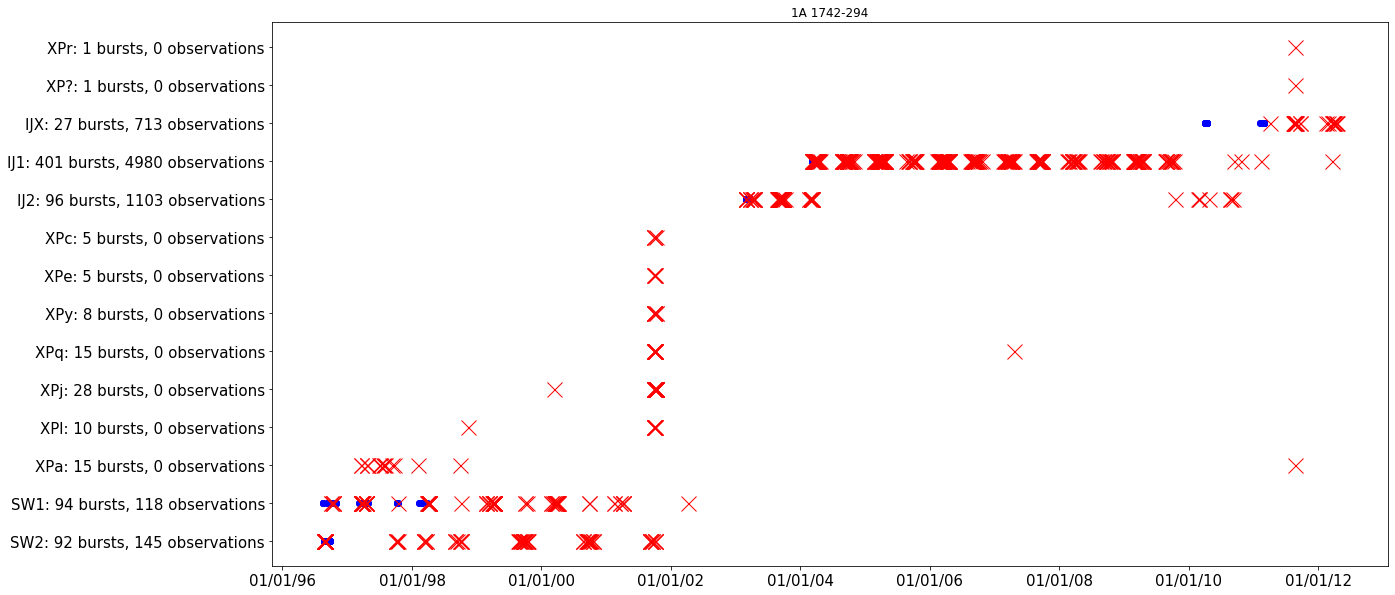

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
xfmt = mdates.DateFormatter('%d/%m/%y')
ax.xaxis.set_major_formatter(xfmt)
instruments = bursts_table['instr'].unique()
yticks = []
for i in range(len(instruments)):
    print(i)
    ob = osbervations_table[osbervations_table['instr'] == instruments[i]]
    ob.index = np.arange(len(ob))
    if (len(ob)>0):
        for j in range(50):#len(ob)):
            plt.plot([ob['tstart_s'][j], ob['tstop_s'][j]], np.ones(2)*i, 'bo-', linewidth=2)  
    b = bursts_table[bursts_table['instr'] == instruments[i]]['time_s']
#     plt.scatter(b, [instruments[i] + ': ' + str(len(b)) + ' bursts']*len(b), label = instruments[i] + ': ' + str(len(b)) + ' bursts', s=35, marker='x', color='red')
    plt.plot(b, np.ones(len(b))*i, 'rx', markersize= 15)
    yticks.append(instruments[i] + ': ' + str(len(b)) + ' bursts, ' + str(len(ob)) + ' observations')
plt.title('1A 1742-294')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.savefig('instr_timeline.eps', bbox_inches='tight')
# plt.savefig('instr_timeline.png', bbox_inches='tight')
ax.set_yticks([i for i in range(14)])
ax.set_yticklabels(yticks)
plt.show()

In [8]:
s = 0
for i in range(len(instruments)):
    print(instruments[i], end=' ')
    x = len(osbervations_table[osbervations_table['instr'] == instruments[i]])
    s+= x
    print(x)
print(s)

SW2 145
SW1 118
XPa 0
XPl 0
XPj 0
XPq 0
XPy 0
XPe 0
XPc 0
IJ2 1103
IJ1 4980
IJX 713
XP? 0
XPr 0
7059


In [10]:
import interval

In [11]:
#объединенные интервалы наблюдений
merged_intervals = interval.interval()
for i in range(len(instruments)):
    ob = osbervations_table[osbervations_table['instr'] == instruments[i]]
    ob.index = np.arange(len(ob))
    if (len(ob)>0):
        for j in range(len(ob)):
            merged_intervals = merged_intervals | interval.interval([ob['tstart'][j], ob['tstop'][j]])


In [12]:
len(merged_intervals)

7016

In [13]:
len(osbervations_table)

7059

In [14]:
# объединенные времена вспышек
def notfoundsim(b, merged_bursts, time_lag=30):
    # if len(merged_bursts)==0:
        # return True
    for x in merged_bursts:
        delta = (Time(x, format='mjd')-Time(b, format='mjd')).to_datetime().total_seconds()
        if (np.abs(delta) <= time_lag):
            return False
    return True

merged_bursts = []
for i in range(len(instruments)):
    ob = osbervations_table[osbervations_table['instr'] == instruments[i]]
    if len(ob)>0:
        b = bursts_table[bursts_table['instr'] == instruments[i]]['time']
        for j in b:
            if notfoundsim(j, merged_bursts):
                merged_bursts.append(j)
    

In [15]:
len(merged_bursts)

710

In [16]:
time_intervals = []
for interv in merged_intervals:
    tm1 = Time(interv[0], format='mjd')
    d1 = datetime.datetime.strptime(tm1.iso, '%Y-%m-%d %H:%M:%S.%f').strftime("%Y-%m-%d %H:%M:%S.%f")
    tm2 = Time(interv[1], format='mjd')
    d2 = datetime.datetime.strptime(tm2.iso, '%Y-%m-%d %H:%M:%S.%f').strftime("%Y-%m-%d %H:%M:%S.%f")
    time_intervals.append([d1,d2])

events = []
for burst in merged_bursts:
    tm = Time(burst, format='mjd')
    d = datetime.datetime.strptime(tm.iso, '%Y-%m-%d %H:%M:%S.%f')
    events.append(d)

In [17]:
from event_generator import Events
from search_period import periods_statistic

In [18]:
start, intrvls = Events.dates_to_seconds(time_intervals)
evnts = []
for event in events:
    evnts.append((event-start).total_seconds())
evnts = np.array(evnts)
intrvls = np.array(intrvls)

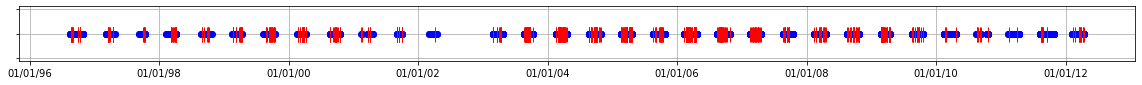

In [19]:
fig, ax = plt.subplots(figsize=(20,1))

# for i in range(10):#len(merged_intervals)):
    # plt.plot([merged_intervals[i][0], merged_intervals[i][1]], np.zeros(2), 'bo', linewidth=20)

for interv in merged_intervals:
    tm1 = Time(interv[0], format='mjd')
    d1 = datetime.datetime.strptime(tm1.iso, '%Y-%m-%d %H:%M:%S.%f')
    tm2 = Time(interv[1], format='mjd')
    d2 = datetime.datetime.strptime(tm2.iso, '%Y-%m-%d %H:%M:%S.%f')
    plt.plot([d1, d2], np.zeros(2), 'bo-', linewidth=5)

plt.plot(events, np.zeros(len(events)), 'ro', marker='|', markersize=15)
xfmt = mdates.DateFormatter('%d/%m/%y')
ax.xaxis.set_major_formatter(xfmt)
ax.set_yticklabels([])
plt.grid()
# plt.savefig('timeline.eps', bbox_inches='tight')
# plt.savefig('timeline.png', bbox_inches='tight', dpi = 200)
plt.show()

In [20]:
n_steps = 1000
per = np.zeros(3*n_steps)
stat = np.zeros(3*n_steps)

In [21]:
pmin = (events[1]-events[0]).total_seconds()
pmax = 3600*24*1
print((pmax-pmin)/n_steps/3600)
hper, hstat, hstat1, hstat2 = periods_statistic(evnts, intrvls, 10, pmin, pmax, n_steps = n_steps)

0.004731839999999999
Completed for 1.2119455178578695 minutes


In [22]:
def one(t, *args):
    return 1

num = 10
freq = len(evnts)/np.sum(intrvls.T[1]-intrvls.T[0])
print(freq)
hxstats = np.zeros((num, n_steps))

pmin = (events[1]-events[0]).total_seconds()
pmax = 3600*24*1
for i in range(num):
    x = Events(freq, time_intervals, one, 0)
    xevnts = np.array(x.events_in_seconds)
    xintrvls = np.array(x.intervals_in_seconds)
    print(i)
    hxper, xstat, xstat1, xstat2 = periods_statistic(xevnts, intrvls, 10, pmin, pmax, n_steps = n_steps)
    hxstats[i] = xstat2
    
    

2.4858240331670006e-05
0
Completed for 0.8840418855349222 minutes
1
Completed for 0.8536482373873393 minutes
2
Completed for 0.8504474480946859 minutes
3
Completed for 0.8376375158627828 minutes
4
Completed for 0.8813783168792725 minutes
5
Completed for 0.8792257348696391 minutes
6
Completed for 0.9554467995961508 minutes
7
Completed for 0.8457621335983276 minutes
8
Completed for 0.8455403327941895 minutes
9
Completed for 0.8349916299184164 minutes


In [23]:
name = '1A 1742-294'

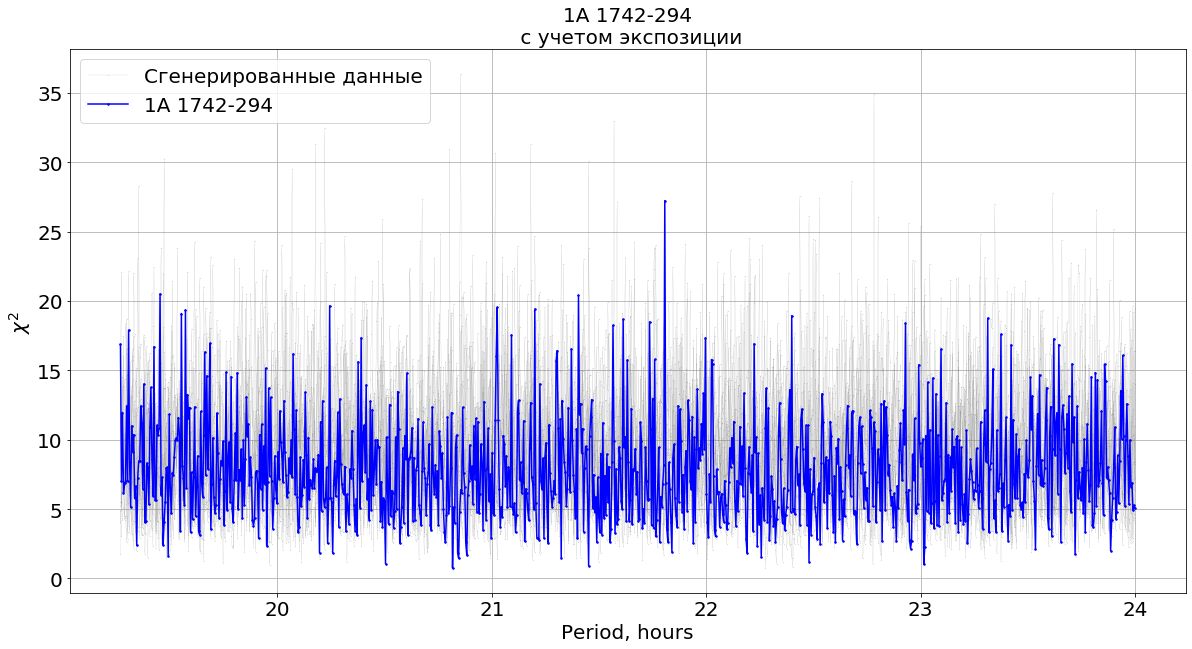

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(np.array(hxper)/(3600), hxstats[0], 'o-', color='gray', markersize=0.1, linewidth=0.1, label='Сгенерированные данные')
for i in range(1, num):
        plt.plot(np.array(hxper)/(3600), hxstats[i], 'o-', color='gray', markersize=0.1, linewidth=0.1)
plt.plot(np.array(hper)/(3600), hstat2, 'bo-', markersize = 1.5, label=name)
fontsize = 20
labelsize = 20
plt.xlabel('Period, hours', fontsize=fontsize)
plt.ylabel('$\chi^2$', fontsize=fontsize)
plt.grid()
plt.legend(fontsize=labelsize)
# plt.xlim(10,15)
plt.title(name + '\n с учетом экспозиции', fontsize=labelsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.annotate('max: 12.77 years', (12.77, 557), xytext=(6, 500), arrowprops=dict(color='gray', width=0.3), fontsize=15)
# plt.savefig('hours.eps')
# plt.savefig('hours1.png', dpi=200)
plt.show()


In [36]:
filename = 'data/' + name  + '/asu.tsv'
df = pd.read_csv(filename, comment='#', sep='\t', header=0, index_col=False)
# import os
# os.getcwd()
# with open("/data/asu.tsv", 'r+') as t:
#     for line in t:
#         line

In [59]:
df = df.drop(0).drop(1)

In [253]:
bursts_2 = []
for x in df['Obs']:
    bursts_2.append(Time(x, format='isot', scale='utc').mjd)           
len(bursts_2)
# v = df['Obs']
# list(v)
# # Time(v, format='isot', scale='utc')

167

In [123]:
bursts_1 = (bursts_table[(bursts_table['instr'] == 'IJX') | (bursts_table['instr'] == 'IJ1') | (bursts_table['instr'] == 'IJ2')])['time']
bursts_1.index = np.arange(len(bursts_1))
    

In [126]:
bursts_1 = np.array(bursts_1)
bursts_2 = np.array(bursts_2)

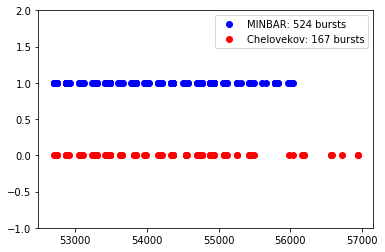

In [137]:
xfmt = mdates.DateFormatter('%d/%m/%y')
ax.xaxis.set_major_formatter(xfmt)
ax.set_yticklabels([])
plt.plot(bursts_1, np.ones(len(bursts_1)), 'bo', label='MINBAR: ' + str(len(bursts_1)) + ' bursts')
plt.plot(bursts_2, np.zeros(len(bursts_2)), 'ro', label='Chelovekov: '+ str(len(bursts_2)) + ' bursts')
plt.ylim(-1, 2)
plt.legend()
plt.show()

In [147]:
bursts_1_s = [datetime.datetime.strptime(x.iso, '%Y-%m-%d %H:%M:%S.%f') for x in Time(bursts_1, format='mjd')]
bursts_2_s = [datetime.datetime.strptime(x.iso, '%Y-%m-%d %H:%M:%S.%f') for x in Time(bursts_2, format='mjd')]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


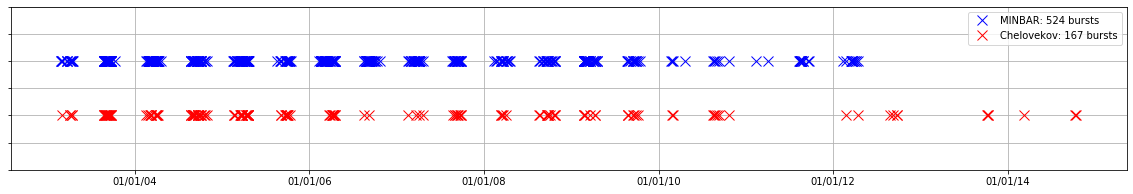

In [249]:
fig, ax = plt.subplots(figsize=(20,3))
xfmt = mdates.DateFormatter('%d/%m/%y')
ax.xaxis.set_major_formatter(xfmt)
# ax.set_xticklabels(['03'])
ax.set_yticklabels([])
plt.plot(bursts_1_s, np.ones(len(bursts_1_s)), 'bx', label='MINBAR: ' + str(len(bursts_1_s)) + ' bursts', markersize=10)
plt.plot(bursts_2_s, np.zeros(len(bursts_2_s)), 'rx', label='Chelovekov: '+ str(len(bursts_2_s)) + ' bursts', markersize=10)
plt.ylim(-1, 2)
plt.legend()
plt.grid()
plt.savefig('MINBAR_Ch_timeline.eps')
plt.savefig('MINBAR_Ch_timeline.png')
plt.show()

In [193]:
len(bursts_1)

524

In [192]:
len(bursts_2)

167

In [230]:
def match(b, merged_bursts, time_lag=30):
    # if len(merged_bursts)==0:
        # return True
    for x in merged_bursts:
        delta = (Time(x, format='mjd')-Time(b, format='mjd')).to_datetime().total_seconds()
        if (np.abs(delta) <= time_lag):
            return x
    return 'null'

matches = []
matches_s_1 = []
matches_s_2 = []
not_matches_1 = []
not_matches_2 = []
not_matches_s_1 = []
not_matches_s_2 = []
for b1 in bursts_1:
    x = match(b1, bursts_2)
    if x != 'null':
        index = np.argwhere(bursts_2==x)
        bursts_2 = np.delete(bursts_2, index)
        matches.append([b1, x])
        matches_s_1.append(datetime.datetime.strptime(Time(b1, format='mjd').iso, '%Y-%m-%d %H:%M:%S.%f'))
        matches_s_2.append(datetime.datetime.strptime(Time(x, format='mjd').iso, '%Y-%m-%d %H:%M:%S.%f'))
    else:
        not_matches_1.append(b1)
        not_matches_s_1.append(datetime.datetime.strptime(Time(b1, format='mjd').iso, '%Y-%m-%d %H:%M:%S.%f'))
for j in bursts_2:
    not_matches_2.append(j)
    not_matches_s_2.append(datetime.datetime.strptime(Time(j, format='mjd').iso, '%Y-%m-%d %H:%M:%S.%f'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


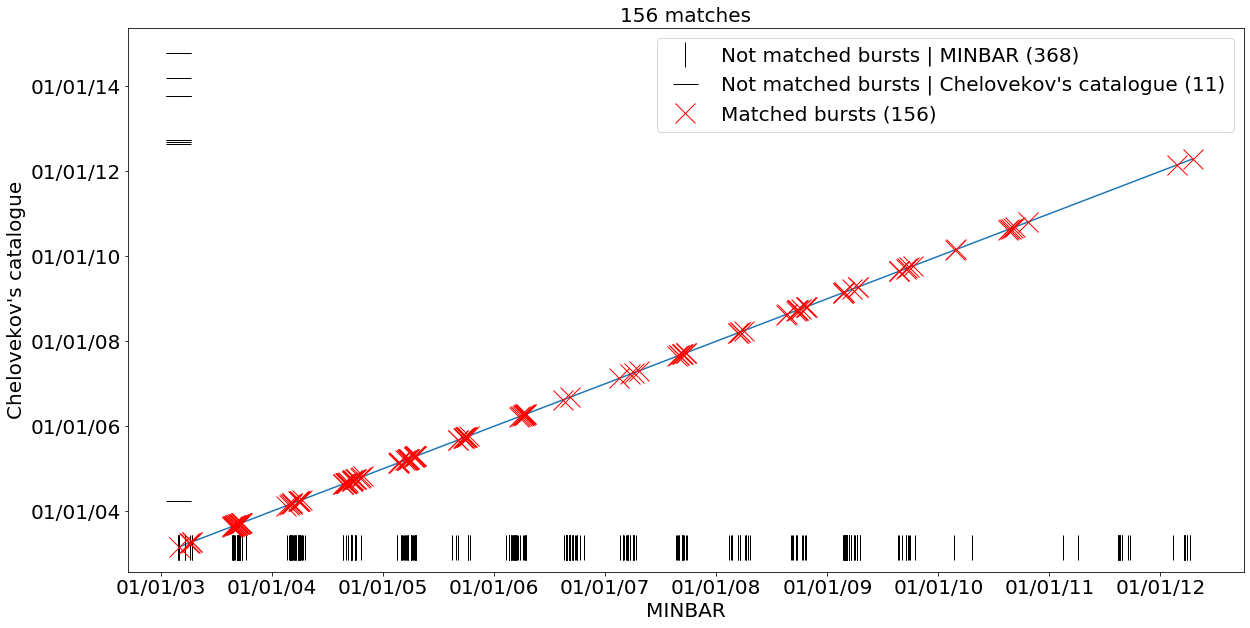

In [246]:
fig, ax = plt.subplots(figsize=(20,10))
xfmt = mdates.DateFormatter('%d/%m/%y')
ax.xaxis.set_major_formatter(xfmt)
ax.yaxis.set_major_formatter(xfmt)
# ax.set_xticklabels(['03'])
# ax.set_yticklabels([])
plt.plot(matches_s_1, matches_s_1)
plt.plot(not_matches_s_1, len(not_matches_s_1)*[not_matches_s_1[0]], 'k|', markersize=25, label='Not matched bursts | MINBAR (' + str(len(not_matches_s_1))+')')
plt.plot(len(not_matches_s_2)*[not_matches_s_1[0]], not_matches_s_2, 'k_', markersize=25, label='Not matched bursts | Chelovekov\'s catalogue (' + str(len(not_matches_s_2))+')')
plt.plot(matches_s_1, matches_s_2, 'rx', markersize=20, label='Matched bursts (' + str(len(matches))+')')
plt.xlabel('MINBAR', fontsize=labelsize)
plt.ylabel('Chelovekov\'s catalogue', fontsize=labelsize)
plt.title(str(len(matches)) + ' matches',fontsize=labelsize)
# plt.plot(bursts_2_s, np.zeros(len(bursts_2_s)), 'rx', label='Chelovekov: '+ str(len(bursts_2)) + ' bursts', markersize=10)
# plt.ylim(-1, 2)
plt.legend(fontsize=labelsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
# plt.grid()
# plt.savefig('MINBAR_Ch_comparison.eps')
# plt.savefig('MINBAR_Ch_comparison.png')
plt.show()

In [231]:
len(matches)

156

In [233]:
len(not_matches_1)

368

In [254]:
len(bursts_2)

167

In [260]:
np.max(np.abs(np.array(matches).T[0]-np.array(matches).T[1]))*24*3600

13.647999800741673